## 통계학실험 과제8
컴퓨터공학부
장수한(2021-14687)

## Problem 1

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# random seed를 2021로 설정함
np.random.seed(2021)
np.set_printoptions(threshold=10)

mu = [3, 4]
cov = [[10, -8], [-8, 10]]
data = np.random.multivariate_normal(mean=mu, cov=cov, size=100)

# 생성한 데이터를 출력
print("Data:\n", data)


Data:
 [[-0.78981629  9.14183803]
 [ 3.4488333   1.93812508]
 [ 0.62686822  4.96212321]
 ...
 [ 6.51508666 -1.59108349]
 [ 0.38807104  5.36347286]
 [ 4.24503331  1.38245877]]


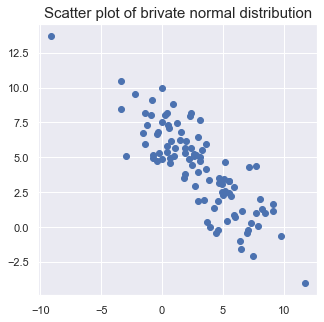

In [102]:
# 산점도를 그려 출력함
plt.title("Scatter plot of brivate normal distribution", fontsize=15)
plt.plot(data[:, 0], data[:, 1], "C0o")
plt.show()

In [103]:
from scipy.stats import pearsonr

# 상관계수와 p-value를 구하여 출력함
r_val, p_val = pearsonr(data[:, 0], data[:, 1])
print("상관계수: {:.5f}, p-value: {}".format(r_val, p_val))

상관계수: -0.83658, p-value: 2.3435871253166954e-27


## Problem 2

In [104]:
import pandas
pd_data = pandas.read_csv("Real estate.csv")

# 데이터의 개수를 출력
data_num = len(pd_data)
print("Data Num: ", data_num)

# 데이터가 어떻게 구성되어 있는지 관찰
pd_data.head()

Data Num:  414


,X1,X2,X3,X4,X5,X6,Y
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [105]:
# 상관행렬을 출력함
pd_data.corr(method='pearson')

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


## Problem 3

In [106]:
from statsmodels.formula.api import ols

# 종속변수 Y, 독립변수 X2로 선형회귀모형을 구축
model = ols("Y ~ X2", pd_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     19.11
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           1.56e-05
Time:                        16:46:08   Log-Likelihood:                -1658.3
No. Observations:                 414   AIC:                             3321.
Df Residuals:                     412   BIC:                             3329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.4347      1.211     35.042      0.0

In [107]:
print("직선 y = %.4fx + %.4f" %(-0.2515, 42.4347))

# 회귀계수의 추정값을 출력함
print("(회귀계수 추정값) = %.4f" %(-0.2515))

직선 y = -0.2515x + 42.4347
(회귀계수 추정값) = -0.2515


## Problem 4

-----Variable Discription-----  
X1 : transaction date  
X2 : house age  
X3 : distance to the nearest MRT station  
X4 : number of convenience stores  
X5 : latitude  
X6 : longitude  
Y : house price of unit area  

In [108]:
# Y를 반응변수, X2, X3, ... X6를 설명변수로 하여 선형회귀모형을 구축함
model_mult = ols("Y ~ X2 + X3 + X4 + X5 + X6", pd_data).fit()
print(model_mult.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     108.7
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           9.34e-73
Time:                        16:46:10   Log-Likelihood:                -1492.4
No. Observations:                 414   AIC:                             2997.
Df Residuals:                     408   BIC:                             3021.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4945.5951   6211.157     -0.796      0.4

X2(house age)와 Y(house price of unit area)의 유의성 검정 결과  
t=-6.896, 유의확률은 0에 매우 가까운 값으로 나타났다.  
따라서 house age는 house price of unit area를 설명함에 있어 상당히 유의미한 변수라고 볼 수 있다.  
또한 유의수준 5%에서 X2, X3, ..., X6 각각의 계수에 대한 유의성 검정결과  
X2, X3, X4, X5의 유의확률은 0.05보다 작았으나 X6의 유의확률은 0.875로 0.05보다 크게 나타났다.  
즉 유의수준 5%에서 유의미한 변수는 X2, X3, X4, X5 이며 유의미하다고 볼 수 없는 변수는 X6임을 알 수 있다.


## Problem 5

In [109]:
# X6를 제외하여 선형회귀모형을 구축함
model_prop = ols("Y ~ X2 + X3 + X4 + X5", pd_data).fit()

(1) 잔차도

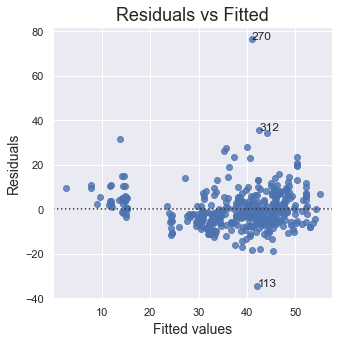

In [110]:
import seaborn
seaborn.set(rc={"figure.figsize":(5, 5)})

# fitted value와 residual value를 저장함
fitted_val = model_prop.fittedvalues
resid_val = model_prop.resid
ar = np.abs(resid_val)

# residuals 중 절대값이 큰 3개를 찾음
ar_sort = ar.sort_values(ascending=False)
top3 = ar_sort[:3]

# 잔차도를 그림
seaborn.residplot(x=fitted_val, y=resid_val, data=pd_data)
plt.title("Residuals vs Fitted", fontsize=18)
plt.ylabel("Residuals", fontsize=14)
plt.xlabel("Fitted values", fontsize=14)

# residuals 중 절대값이 큰 3개를 표시함
for idx in top3.index:
    plt.annotate(idx, xy=(fitted_val[idx], resid_val[idx]))
plt.show()

위의 잔차도를 확인해보면, 등분산성 가정을 위배하거나 특정 패턴을 따르는 것으로 보이지 않는다.  
몇몇 데이터(113번, 270번)는 적정 범위로부터 크게 벗어난 것으로 여겨지나  
이를 제외하면 잔차들이 거의 0부근에 위치한다고 볼 수 있다.

(2) 정규분위수 그래프

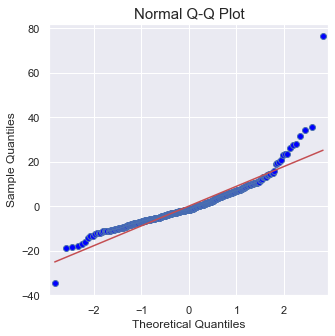

In [111]:
from statsmodels.graphics.gofplots import ProbPlot

# 정규분위수 그래프를 그림
QQ = ProbPlot(resid_val)
plot = QQ.qqplot(line='s', color='C0', lw=1)
plt.title("Normal Q-Q Plot", fontsize=15)
plt.show()

정규분위수 그래프를 보면 양쪽 말단(x<-2 or x>1.8)에서 직선으로부터 벗어나는 현상을 보였으나  
잔차들의 대부분 { x$\in$(-2, 1.5) }은 직선의 개형을 따른다고 볼 수 있다.  
즉, 문제 4에서 중선형회귀모형을 적용한 것이 타당하다고 볼 수 있다.